<a href="https://colab.research.google.com/github/prodramp/python-projects/blob/main/deeplearning/cnn/mnist_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
x_test.shape

(10000, 28, 28)

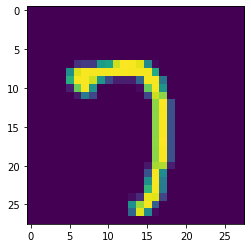

In [12]:
import matplotlib.pyplot as plt
plt.imshow(x_test[2700]) #cmap="gray"

In [16]:
x_test[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [13]:
# Model / data parameters
num_classes = 10

In [17]:
# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255


In [18]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [19]:



# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")



x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [20]:

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [21]:
# Model / data parameters
input_shape = (28, 28, 1)

In [22]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),  ## Experiment with removing the Dropout function
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

In [23]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [26]:
batch_size = 128
epochs = 2

# **Understanding Batch and Epoch**

- Batch Size = 128
- 128 * 422 = 54016   <=== 422 times for each epoch
  - Because validation_split is 0.1, 
  - means 10 % of 60000 = 6000 records are for validation 
  - so only 54000 records are for training
- Batch Size = 64
- 64 * 844 = 54016. <=== 844 times for each epoch
  - Because validation_split is 0.1, 
  - means 10 % of 60000 = 6000 records are for validation 
  - so only 54000 records are for training


In [27]:
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/2
422/422 [==============================] - 38s 90ms/step - loss: 0.0718 - accuracy: 0.9783 - val_loss: 0.0423 - val_accuracy: 0.9878
Epoch 2/2
 17/422 [>.............................] - ETA: 35s - loss: 0.0591 - accuracy: 0.9807

KeyboardInterrupt: ignored

In [28]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.039626482874155045
Test accuracy: 0.9868999719619751


In [40]:
x_test[999].shape

(28, 28, 1)

In [41]:
test_img = x_test[999]

In [42]:
test_img.shape

(28, 28, 1)

In [43]:
test_img_new = test_img[:, :, 0]

In [44]:
test_img_new.shape

(28, 28)

In [45]:
#test_img

In [46]:
import matplotlib.pyplot as plt

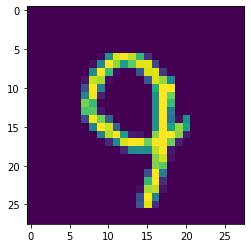

In [47]:
plt.imshow(test_img_new)

In [ ]:
x_test.shape

In [ ]:
np.array(x_test[0]).shape

In [48]:
preds = model.predict(np.array([x_test[999]]))

In [49]:
preds.shape

(1, 10)

In [50]:
preds[0]

array([2.4313720e-05, 1.7796541e-09, 1.0599948e-05, 4.6256922e-05,
       2.1636931e-03, 8.6010994e-05, 9.4889590e-09, 5.7464824e-03,
       1.7768121e-03, 9.9014586e-01], dtype=float32)

In [51]:
classes = np.argmax(preds, axis = 1)
print(classes)

[9]


In [ ]:
!pip install netron

In [52]:
model_name = 'mnist_keras.h5'

In [53]:
model.save(model_name)

In [54]:
!ls -lah

total 464K
drwxr-xr-x 1 root root 4.0K Apr  6 06:17 .
drwxr-xr-x 1 root root 4.0K Apr  6 04:37 ..
drwxr-xr-x 4 root root 4.0K Mar 23 14:21 .config
-rw-r--r-- 1 root root 445K Apr  6 06:17 mnist_keras.h5
drwxr-xr-x 1 root root 4.0K Mar 23 14:22 sample_data


In [ ]:
import netron as nt

In [ ]:
nt.start(model_name, 8081)